In [2]:
import numpy as np

Умеем делать прямой проход по нейронной сети, пора учиться делать обратный, чтобы она хоть чему-то училась.

![](https://i0.wp.com/analyticsarora.com/wp-content/uploads/2021/09/Understand-The-Backpropagation-Algorithm-Interview-Question.png?resize=800%2C600&ssl=1)

## Сначала закодим прямой проход по сети, и обернем это все в класс

#### Но до этого необходимо описать слои в виде класса

# Задача 1. Реализовать линейный слой

In [5]:
class LinearLayer():
    def __init__(self, in_size, out_size):
        self.W = np.random.randn(in_size, out_size)
        self.params = [self.W]
        self.gradW = None
        self.gradInput = None
        
    def forward(self, X):
        self.X = X.copy()
        output = X.dot(self.W)
        return output

In [6]:
np.random.seed(17)

X = np.random.random(size=(10000, 5))
linear = LinearLayer(5, 3)
output = linear.forward(X)
correct_answer = np.array([[-0.75476927,  0.39598163, -0.11428765],
                           [ 1.28828674, -0.90586033,  0.67063637],
                           [ 2.51515422, -0.95305043,  1.4073423 ]])
assert np.isclose(output[:3], correct_answer).all()

# Задача 2. Реализовать ReLU-активацию слоя 

![ReLU Image](https://pytorch.org/docs/stable/_images/ReLU.png)

In [7]:
class ReLULayer():
    def __init__(self):
        self.params = []
        self.gradInput = None

    def forward(self, X):
        self.X = X.copy()
        output = np.maximum(X, 0)
        return output

In [8]:
np.random.seed(17)

X = np.random.random(size=(10000, 5))
linear = LinearLayer(5, 3)
output = linear.forward(X)
output_relu = ReLULayer().forward(output)
correct_answer = np.array([[0,  0.39598163, 0],
                           [1.28828674, 0,  0.67063637],
                           [2.51515422, 0,  1.4073423 ]])
assert np.isclose(output_relu[:3], correct_answer).all()

# Задача 3. Реализовать функцию потерь

Для бинарной классификации Binary Cross Entropy Loss:
$$
H(\hat{y}, y) = - \frac{1}{N} \sum_{j}^N y^j\cdot log(\hat{y}^j) + (1 - y^j) \cdot log(1 - \hat{y}^j)
$$
$\hat{y}^j$ - предсказанное значение класса  
$y^j$ - истинное значение класса  
$N$ - количество наблюдений  
  
   
Для задач классификации используется Cross Entropy Loss:
$$
H(\hat{y}, y) = - \frac{1}{N} \sum_{j}^N \sum_{i}^M{y_i^j\cdot log(\hat{y}_i^j)}
$$
$\hat{y}_i^j$ - предсказанное значение класса i для наблюдения j   
$y_i^j$ - истинное значение класса i для наблюдения j  
$N$ - количество наблюдений   
$M$ - количество предсказанных классов

In [11]:
class BinaryCrossEntropyLoss():
    def forward(self, y_true, y_pred):
        n = len(y_true)
        loss = - (1 / n) * np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
        return loss

In [14]:
y_true = np.array([1, 1, 0, 0])
y_pred = np.array([0.999, 0.89, 0.2, 0.001])
round(bceloss.forward(y_true, y_pred), 3)

0.085

In [12]:
np.random.seed(17)

bceloss = BinaryCrossEntropyLoss()

y_true = np.array([1, 1, 0, 0])
y_pred = np.array([0.5] * 4)
assert round(bceloss.forward(y_true, y_pred), 3) == 0.693

y_true = np.random.randint(0, 2, size=(100))
y_pred = np.random.random(100)
assert round(bceloss.forward(y_true, y_pred), 3) == 0.997

# Задача 4\*. Реализовать обратный проход по линейному слою

Здесь начинаем работать с градиентами.  
1. Зачем вообще градиент?  
2. Причем здесь веса?  
3. Почему не можем менять изначальные данные?  

In [36]:
class LinearLayerWithBackprop(LinearLayer):
    def backward(self, dout):
        pass

In [52]:
np.random.seed(17)

# initialization
linear_backprop = LinearLayerWithBackprop(5, 3)
X = np.random.randn(10000, 5)

# forward pass
linear_output = linear_backprop.forward(X)

# backpropagation
dout = np.random.randn(10000, 3)
dX, dW = linear_backprop.backward(dout)

assert dX.shape == X.shape
assert dW.shape == linear_backprop.W.shape
assert round(dX.sum(), 3) == 647.044
assert round(dW.sum(), 3) == 397.748

# Задача 5\*. Реализовать обратный проход по ReLU слою

In [ ]:
class ReLULayerWithBackprop(ReLULayer):   
    def backward(self, dout):
        pass

In [67]:
np.random.seed(17)

# initialization
relu_backprop = ReLULayerWithBackprop()
X = np.random.randn(10000, 5)

# forward pass
relu_output = relu_backprop.forward(X)

# backpropagation
dout = np.random.randn(10000, 5)
dX = relu_backprop.backward(dout)

assert dX.shape == X.shape
assert round(dX.sum(), 3) == 170.764

# Задача 6\*. Реализовать обратный проход по BCELoss

In [202]:
class BinaryCrossEntropyLossWithBackprop(CrossEntropyLoss):
    def backward(self, y_true, y_pred):
        pass

In [321]:
y_true = np.array([1, 1, 1, 0, 0])
y_pred = np.array([0.99, 0.9, 0.8, 0.5, 0.2])
bceloss_backward = BinaryCrossEntropyLossWithBackprop()

right_answer = np.array([0.2020202, 0.22222222, 0.25, -0.4, -0.25])
assert np.isclose(bceloss_backward.backward(y_true, y_pred), right_answer).all()

# Задача 7\*. Реализовать свою нейросеть

In [348]:
def minibatch(X, y, minibatch_size):
    n = X.shape[0]
    minibatches = []

    for i in range(0, n , minibatch_size):
        X_batch = X[i:i + minibatch_size, ...]
        y_batch = y[i:i + minibatch_size, ...]

        minibatches.append((X_batch, y_batch))
    return minibatches

In [349]:
def update(velocity, params, grads, learning_rate=0.001, mu=0.9):
    for v, p, g, in zip(velocity, params, reversed(grads)):
        for i in range(len(g)):
            v[i] = mu * v[i] + learning_rate * g[i]
            p[i] -= v[i]

In [350]:
def plot_train_process(train_acc_list, val_acc_list, 
                       mean_train_loss_list, mean_val_loss_list):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    axes[0].set_title('Accuracy')
    axes[1].set_title('Loss')
    
    axes[0].plot(train_acc_list, label='train')
    axes[0].plot(val_acc_list, label='val')
    axes[0].legend()
    
    axes[1].plot(mean_train_loss_list, label='train')
    axes[1].plot(mean_val_loss_list, label='val')
    axes[1].legend()
    
    plt.show()


def train(net, X_train, y_train, minibatch_size, epoch, learning_rate, mu=0.9,
                 verbose=True, X_val=None, y_val=None, nesterov=True, draw_each_iters=5):
    val_loss_epoch = []
    minibatches = minibatch(X_train, y_train, minibatch_size)
    minibatches_val = minibatch(X_val, y_val, minibatch_size)

    c = 0 

    mean_train_loss_list = []
    mean_val_loss_list = []
    train_acc_list = []
    val_acc_list = []
    for n_iter in range(epoch):
        loss_batch = []
        val_loss_batch = []
        velocity = []
        for param_layer in net.params:
            p = [np.zeros_like(param) for param in list(param_layer)]
            velocity.append(p)

        # iterate over mini batches
        for X_mini, y_mini in minibatches:

            loss, grads = net.train_step(X_mini, y_mini)
            loss_batch.append(loss)
            update(velocity, net.params, grads,
                            learning_rate=learning_rate, mu=mu)

        for X_mini_val, y_mini_val in minibatches_val:
            val_loss, _ = net.train_step(X_mini, y_mini)
            val_loss_batch.append(val_loss)


        # accuracy of model at end of epoch after all mini batch updates   

        if verbose:
            m_train = X_train.shape[0]
            m_val = X_val.shape[0]
            y_train_pred = np.array([], dtype="int64")
            y_val_pred = np.array([], dtype="int64")

            for i in range(0, m_train, minibatch_size):
                X_tr = X_train[i:i + minibatch_size, : ]
                y_tr = y_train[i:i + minibatch_size, ]
                y_train_pred = np.append(y_train_pred, net.predict(X_tr))

            for i in range(0, m_val, minibatch_size):
                X_va = X_val[i:i + minibatch_size, : ]
                y_va = y_val[i:i + minibatch_size, ]
                y_val_pred = np.append(y_val_pred, net.predict(X_va))
        
            train_acc = check_accuracy(y_train, y_train_pred)
            val_acc = check_accuracy(y_val, y_val_pred)
            mean_train_loss = sum(loss_batch) / float(len(loss_batch))
            mean_val_loss = sum(val_loss_batch) / float(len(val_loss_batch))
            
            train_acc_list.append(train_acc)
            val_acc_list.append(val_acc)
            
            mean_train_loss_list.append(mean_train_loss)
            mean_val_loss_list.append(mean_val_loss)

            # early stopping with patience = 5 on val loss
            if len(val_loss_epoch) == 0:
                val_loss_epoch.append(mean_val_loss)
            else:
                for j in val_loss_epoch[-5:]:
                    if mean_val_loss > j:
                        c += 1
                    else:
                        c = 0
                if c > 5:
                    print('Early stopping')
                    return net
                else:
                    c = 0
                    val_loss_epoch.append(mean_val_loss)  
                    
            if n_iter % draw_each_iters == 0:
                clear_output(True)
                plot_train_process(train_acc_list, val_acc_list, 
                                   mean_train_loss_list, mean_val_loss_list)
    return net

In [329]:
# Get preprocessed training and validation data

X_train = np.array([
    [1, 2, 1, 2],
    [2, 4, 2, 4],
    [2, 1, 2, 1],
    [4, 2, 4, 2],
])

y_train = np.array([[0], [1], [0], [1]])
X_val = X_train.copy()
y_val = y_train.copy()

print(X_train.shape)
print(X_val.shape)


# define neural net
model = NN()

# add some layers
model.add_layer(LinearLayerWithBackprop(4, 1))

model = train(model, X_train, y_train, minibatch_size=4, epoch=10,
           learning_rate=0.1, X_val=X_val, y_val=y_val, verbose=False)

(4, 4)
(4, 4)


C:\Users\anana\AppData\Local\Temp\ipykernel_4604\1636587052.py:26: RuntimeWarning: invalid value encountered in log
  loss = -(1 / m) * np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))


In [331]:
model.predict(X_train)

array([[12.89091345],
       [25.7818269 ],
       [12.144363  ],
       [24.288726  ]])

In [332]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [333]:
y = y.astype(np.int32)
X = X[(y == 1) | (y == 0)]
y = y[(y == 1) | (y == 0)]
X_train, X_val, y_train, y_val = train_test_split(X, y, 
                                                  test_size=0.25,
                                                  shuffle=True,
                                                  random_state=0)
X_train = X_train.to_numpy()
X_val = X_val.to_numpy()
y_train = y_train.to_numpy()
y_val = y_val.to_numpy()

In [334]:
import matplotlib.pyplot as plt

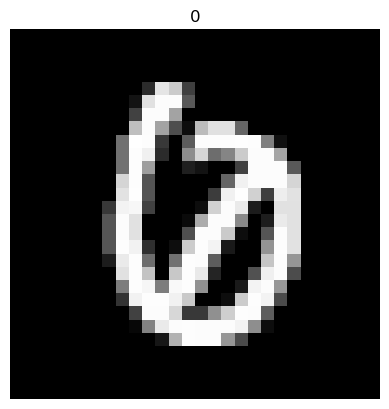

In [335]:
# visualize data

def vis(img, label):
    plt.imshow(img, cmap='gray')
    plt.title(label)
    plt.axis('off')
    plt.show()

vis_idx = 3
vis(X_val[vis_idx].reshape(-1, 28), y_val[vis_idx])

In [336]:
import numpy as np 
import _pickle as cPickle
import gzip
import os
from sklearn.utils import shuffle
from tqdm import tqdm
import matplotlib.pyplot as plt
import time
from IPython.display import clear_output

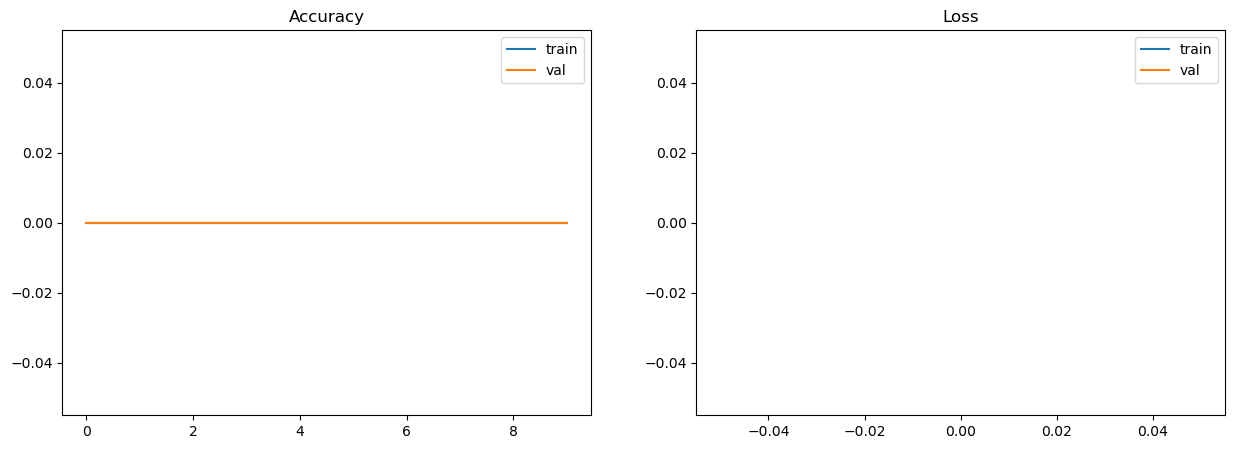

In [351]:
print(X_train.shape)
print(X_val.shape)


# define neural net
model = NN()

# add some layers
model.add_layer(LinearLayerWithBackprop(X.shape[1], 100))
model.add_layer(ReLULayerWithBackprop())
model.add_layer(LinearLayerWithBackprop(100, 100))
model.add_layer(ReLULayerWithBackprop())
model.add_layer(LinearLayerWithBackprop(100, 1))

model = train(model, X_train, y_train.reshape(-1, 1), minibatch_size=128, epoch=10,
           learning_rate=0.001, X_val=X_val, y_val=y_val.reshape(-1, 1), draw_each_iters=1)

In [353]:
y_pred = model.predict(X_val)
from sklearn.metrics import roc_auc_score
1 - roc_auc_score(y_val, y_pred)

0.8617474066313506

In [355]:
y_pred = model.predict(X_train)
from sklearn.metrics import roc_auc_score
1 - roc_auc_score(y_train, y_pred)

0.8635234056443465